**EXEMPLO 1 - O dataset Iris (Iris Flower Dataset)**

É um dos conjuntos de dados mais famosos e utilizados em aprendizado de máquina e estatística para tarefas de classificação supervisionada.

O conjunto de dados possui 150 amostras, com 4 atributos (features) numéricos e 1 rótulo (label) categórico:
| **Atributo**     | **Descrição**              | **Unidade**     |
|------------------|----------------------------|-----------------|
| sepal length     | Comprimento da sépala      | centímetros     |
| sepal width      | Largura da sépala          | centímetros     |
| petal length     | Comprimento da pétala      | centímetros     |
| petal width      | Largura da pétala          | centímetros     |
| species          | Espécie da flor            | categórico      |


Cada uma das três espécies possui 50 amostras, totalizando 150 linhas.

O modelo de aprendizado de máquina deve prever a espécie da flor com base nas quatro medidas numéricas.





In [ ]:
# 1. Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Carregar dataset real (Iris)
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 3. Dividir em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Criar e treinar o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# 5. Fazer previsões
y_pred = modelo.predict(X_test)

In [ ]:
# 6. Calcular métricas
matriz = confusion_matrix(y_test, y_pred)
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='macro')
revocacao = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Matriz de Confusão:\n", matriz)
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {revocacao:.2f}")
print(f"F1-Score: {f1:.2f}")

Matriz de Confusão:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


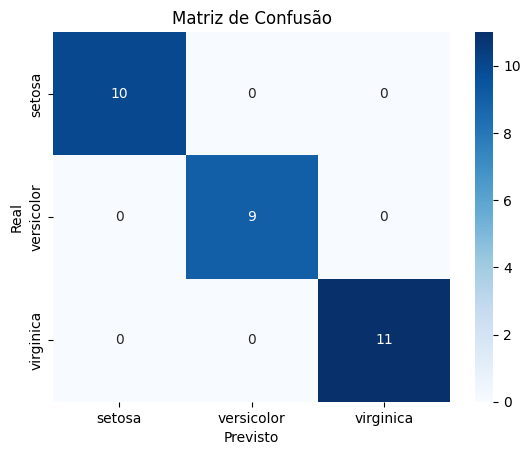

In [ ]:
# 7. Plotar matriz de confusão
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

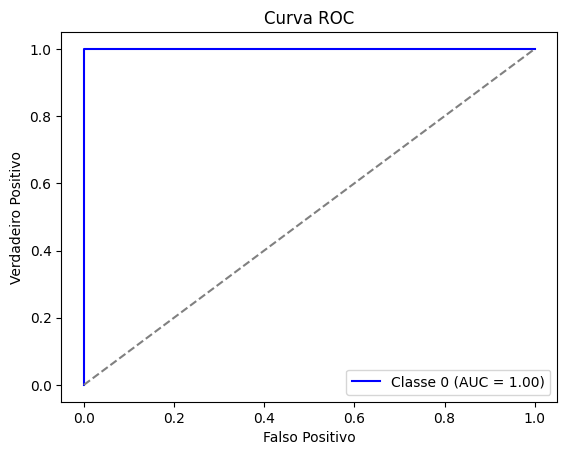

In [ ]:
# 8. Curva ROC e Curva Precisão vs Revocação (para simplificação, apenas uma classe)
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = modelo.predict_proba(X_test)

# ROC da classe 0
fpr, tpr, _ = roc_curve(y_bin[:,0], y_prob[:,0])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'Classe 0 (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

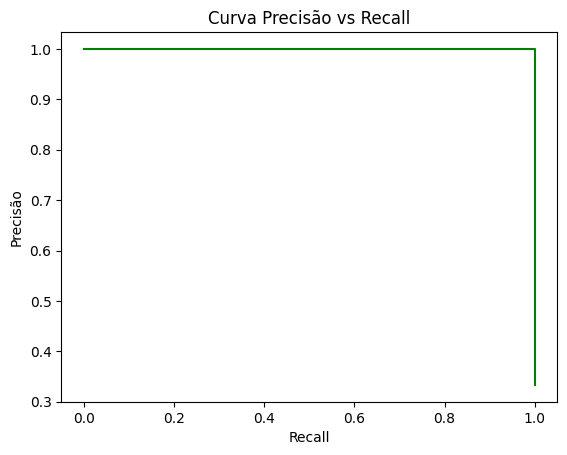

In [ ]:
# Curva Precisão vs Revocação
prec, rec, _ = precision_recall_curve(y_bin[:,0], y_prob[:,0])
plt.plot(rec, prec, color='green')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão vs Recall')
plt.show()

**EXEMPLO 2 - Wisconsin Breast Cancer Dataset (WBCD)**

Foi criado a partir de medições feitas em imagens de aspirado de agulha fina de massas mamárias.
Cada instância representa uma amostra e é composta por medidas calculadas a partir da imagem da célula.

### 📊 Informações sobre o Dataset *Breast Cancer (Wisconsin)*

- **Número de amostras:** 569  
- **Número de atributos (features):** 30  

#### 🧠 Classes (rótulo)
- `0` → **Maligno**  
- `1` → **Benigno**  

#### 📏 Cada linha do dataset contém medidas estatísticas calculadas sobre:
- **Raio:** média das distâncias do centro aos pontos do contorno  
- **Textura:** desvio padrão dos níveis de cinza  
- **Perímetro**  
- **Área**  
- **Suavidade:** variação local no comprimento do raio  
- **Compacidade**, **concavidade**, **simetria**, entre outros  


In [ ]:
# 1. Importar bibliotecas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregar dataset real
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # 0 = maligno, 1 = benigno

# 3. Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Criar e treinar o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Matriz de Confusão:
 [[38  5]
 [ 1 70]]
Acurácia: 0.95
Precisão: 0.93
Recall: 0.99
F1-Score: 0.96


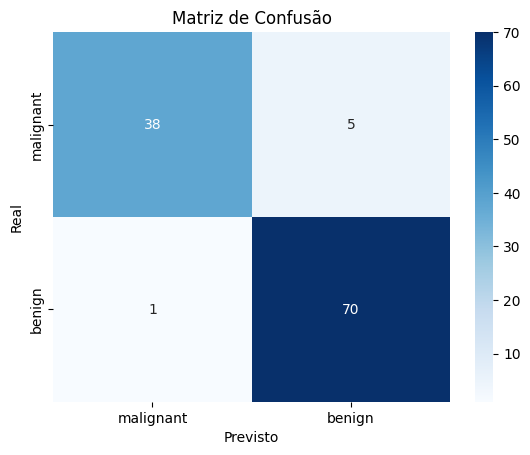

In [ ]:
# 5. Fazer previsões
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # probabilidades da classe positiva

# 6. Calcular métricas
matriz = confusion_matrix(y_test, y_pred)
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
revocacao = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Matriz de Confusão:\n", matriz)
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {revocacao:.2f}")
print(f"F1-Score: {f1:.2f}")

# 7. Plotar matriz de confusão
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

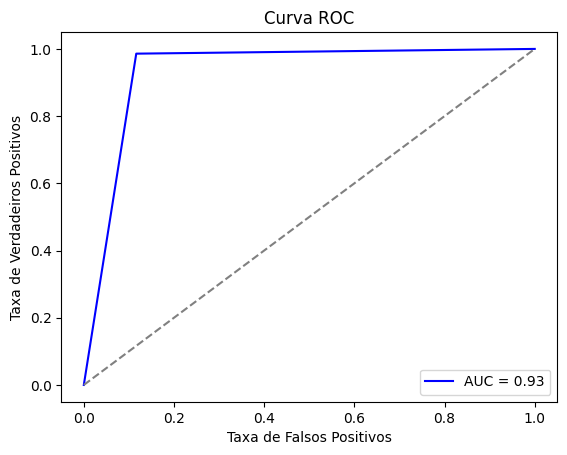

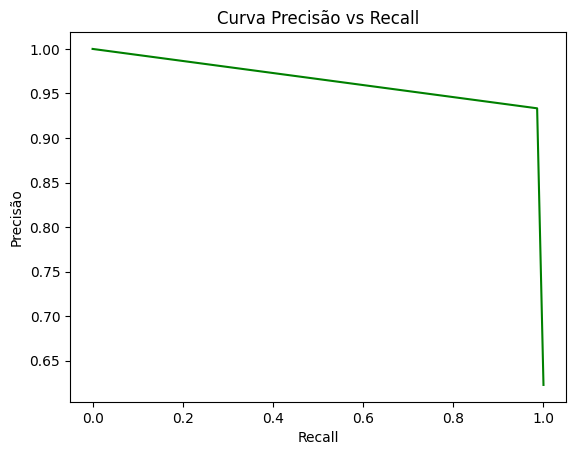

In [ ]:
# 8. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# 9. Curva Precisão vs Recall
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.plot(rec, prec, color='green')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão vs Recall')
plt.show()